# Supervised Learning: Regression and Classification

In this notebook, we will explore some fundamental supervised learning methods. Specifically, we will cover:

1. **Regression**
   - Linear Regression
   - Polynomial Regression

2. **Classification**
   - Logistic Regression
   - k-Nearest Neighbors (k-NN)
   - Decision Trees
   - Support Vector Machines (SVM)

We will use **real-world datasets** (from `scikit-learn`) for demonstration. 
The notebook includes:
- **Theoretical explanations** of each algorithm.
- **Practical Python implementations** using scikit-learn.
- **Static visualizations** (no interactive widgets).

Let's get started!


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set_style("whitegrid")

# For reproducibility
np.random.seed(42)


## Data Overview

We'll use two datasets from scikit-learn for simplicity:
1. [California Housing](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) for **regression** tasks.
2. [Iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) for **classification** tasks.


## Supervised Learning

**Supervised Learning** deals with training models using labeled data (features \\(X\\) and a target label \\(y\\)). 

**Regression**:  
- Target \\(y\\) is continuous.  
- Example: Predicting house prices.

**Classification**:  
- Target \\(y\\) is discrete (categorical).  
- Example: Classifying species of a flower.

We'll start with **Regression** techniques and then explore **Classification**.


# Regression

We will demonstrate **Linear Regression** and **Polynomial Regression** using the California Housing dataset, which has features like median income, average number of rooms, etc., and the target is the median house value in that region.


In [10]:
# Load the California Housing dataset
cal_housing = fetch_california_housing()
X = cal_housing.data
y = cal_housing.target

print("Feature names:", cal_housing.feature_names)
print("Dataset shape:", X.shape)
print("Targets shape:", y.shape)

# For visualization, let's use only the first feature (e.g., 'MedInc') to keep it simple
X_single = X[:, 0]  # Median Income
X_single = X_single.reshape(-1, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_single, y, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset shape: (20640, 8)
Targets shape: (20640,)
Train set shape: (16512, 1) (16512,)
Test set shape: (4128, 1) (4128,)


# California Housing Dataset: Loading and Preprocessing

This section demonstrates how to load and preprocess the **California Housing Dataset**, which contains information about housing in California. The dataset is commonly used for regression tasks, where the target variable represents the median house value in a block group.

---

## Dataset Description:
- **Features**:
  - The dataset includes 8 features, such as:
    - `MedInc`: Median income in the block group.
    - `HouseAge`: Median age of the houses.
    - `AveRooms`: Average number of rooms per household.
    - `AveBedrms`: Average number of bedrooms per household.
    - `Population`: Population in the block group.
    - `AveOccup`: Average household size.
    - `Latitude`: Latitude of the block group.
    - `Longitude`: Longitude of the block group.
- **Target**:
  - `y`: The target variable represents the median house value in $100,000 units.

---

## Steps in the Script:
1. **Load Dataset**:
   - The California Housing dataset is loaded using `fetch_california_housing` from `sklearn.datasets`.
   - Features (`X`) and target (`y`) are extracted.

2. **Dataset Inspection**:
   - The script prints the feature names and dataset shapes for better understanding of the data structure.

3. **Select a Single Feature**:
   - For simplicity in visualization, only the first feature (`MedInc` - median income) is used.
   - This single feature is reshaped to ensure compatibility with the regression model.

4. **Split Data**:
   - The dataset is split into training and testing sets using `train_test_split`:
     - **Training Set**: Used to train the regression model.
     - **Testing Set**: Used to evaluate the model's performance.

---

## Observations:
- The dataset contains 20,640 samples and 8 features.
- Splitting the data ensures a fair evaluation of the model by keeping the test data unseen during training.

---


## Linear Regression

### Theory
For a single feature, Linear Regression assumes:
$$
y \approx \beta_0 + \beta_1 x
$$
It tries to find coefficients $(\beta_0)$ (intercept) and $(\beta_1)$ (slope) that minimize the **Mean Squared Error (MSE)**:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

### Implementation
Let's train a **Linear Regression** model on `MedInc` (Median Income) to predict median house value.


Linear Regression (single feature: MedInc)
  Coefficient (slope): 0.419
  Intercept:           0.445
  MSE on Test:         0.709


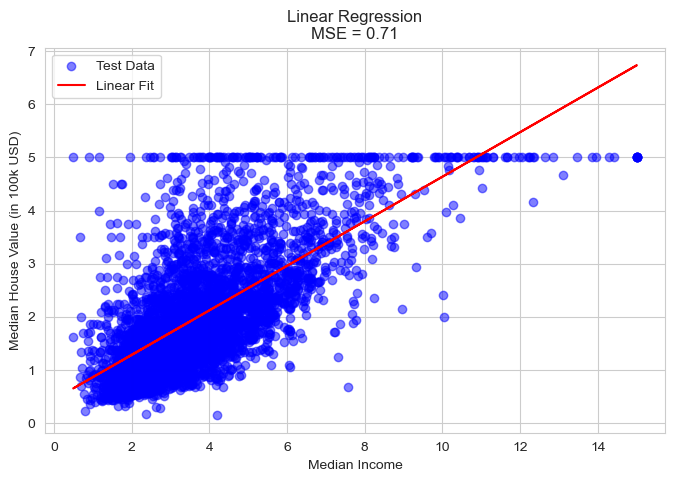

In [11]:
# Train a simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lr = lin_reg.predict(X_test)

# Compute Mean Squared Error
mse_lin = mean_squared_error(y_test, y_pred_lr)

print("Linear Regression (single feature: MedInc)")
print(f"  Coefficient (slope): {lin_reg.coef_[0]:.3f}")
print(f"  Intercept:           {lin_reg.intercept_:.3f}")
print(f"  MSE on Test:         {mse_lin:.3f}")

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Test Data')
plt.plot(X_test, y_pred_lr, color='red', label='Linear Fit')
plt.xlabel("Median Income")
plt.ylabel("Median House Value (in 100k USD)")
plt.title(f"Linear Regression\nMSE = {mse_lin:.2f}")
plt.legend()
plt.show()


# Simple Linear Regression on California Housing Dataset

This script demonstrates how to perform **Linear Regression** using a single feature (`MedInc`, median income) to predict the target variable (`y`, median house value) in the California Housing dataset. Linear Regression is a basic yet powerful regression model used to establish a linear relationship between the independent variable (feature) and the dependent variable (target).

---

## Steps in the Script:
1. **Train the Linear Regression Model**:
   - The `LinearRegression` model from `sklearn` is trained on the training dataset (`X_train`, `y_train`).
   - The model learns the best-fitting line by minimizing the residual sum of squares.

2. **Make Predictions**:
   - The trained model predicts house values on the test dataset (`X_test`).

3. **Evaluate the Model**:
   - **Mean Squared Error (MSE)** is computed on the test data:
     - MSE measures the average squared difference between the predicted and actual values.
     - Lower MSE indicates better model performance.

4. **Visualize the Results**:
   - A scatter plot of the test data (`X_test`, `y_test`) shows the actual house values.
   - The regression line is plotted, representing the predicted house values based on median income.

---

## Observations:
- The **coefficient (slope)** of the line indicates how much the house value changes for a unit increase in median income.
- The **intercept** represents the predicted house value when the median income is zero.
- The **MSE** evaluates the model's performance on unseen data. A lower MSE suggests better predictive accuracy.

---


## Polynomial Regression

### Theory
Sometimes, a linear model might not be sufficient. **Polynomial Regression** adds polynomial terms:
$$
y \approx \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_d x^d
$$
Increasing polynomial degree allows the model to capture more complex relationships, but be mindful of **overfitting**.

### Implementation
We'll loop over different polynomial degrees and compare their performance on the test set.


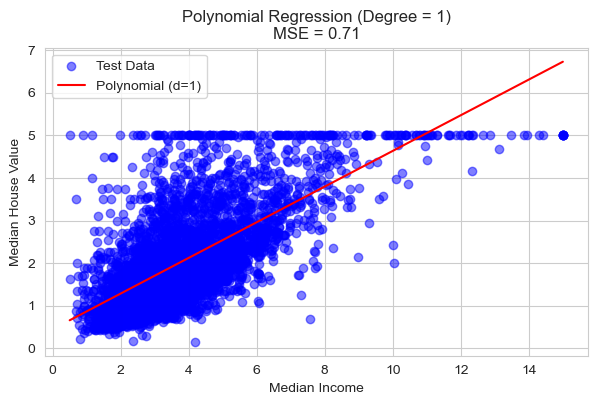

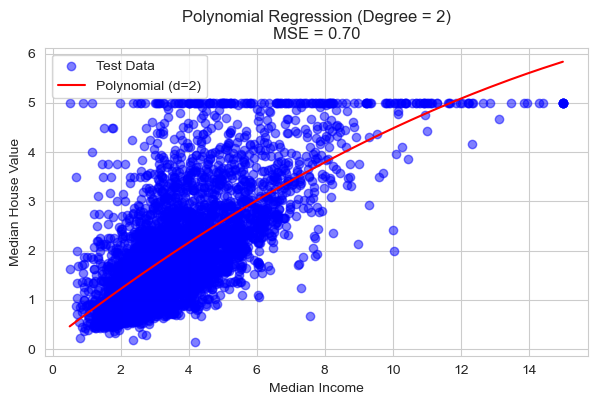

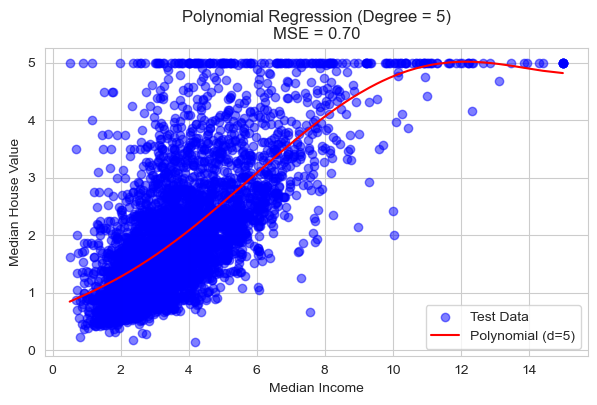

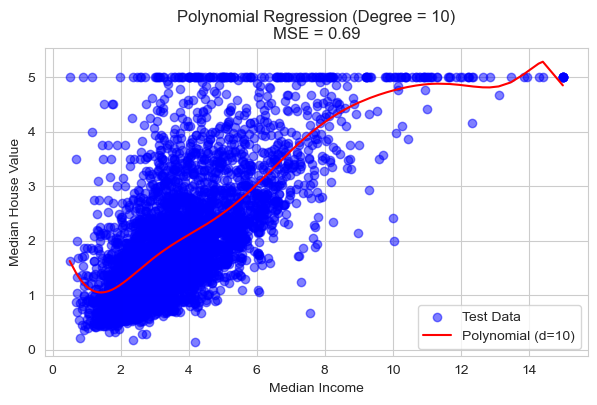

Degree = 1, MSE = 0.71
Degree = 2, MSE = 0.70
Degree = 5, MSE = 0.70
Degree = 10, MSE = 0.69


In [12]:
degrees = [1, 2, 5, 10]
mse_results = []

for d in degrees:
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_train_poly, y_train)

    # Predict
    y_pred_poly = lin_reg_poly.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mse_results.append(mse_poly)

    # For visualization (only recommended for single feature)
    # Sort the test data for a smooth curve
    sort_idx = X_test[:, 0].argsort()
    X_test_sorted = X_test[sort_idx]
    X_test_poly_sorted = poly_features.transform(X_test_sorted)
    y_pred_poly_sorted = lin_reg_poly.predict(X_test_poly_sorted)

    plt.figure(figsize=(7, 4))
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Test Data')
    plt.plot(X_test_sorted, y_pred_poly_sorted, color='red', label=f'Polynomial (d={d})')
    plt.title(f'Polynomial Regression (Degree = {d})\nMSE = {mse_poly:.2f}')
    plt.xlabel('Median Income')
    plt.ylabel('Median House Value')
    plt.legend()
    plt.show()

# Print summary of MSEs
for d, mse_val in zip(degrees, mse_results):
    print(f"Degree = {d}, MSE = {mse_val:.2f}")


# Polynomial Regression on California Housing Dataset

This script demonstrates how to apply **Polynomial Regression** with varying degrees to predict the median house value (`y`) based on the median income (`MedInc`) in the California Housing dataset. Polynomial Regression extends Linear Regression by allowing for non-linear relationships between the feature and the target.

---

## Key Concepts:
1. **Polynomial Features**:
   - Polynomial Regression transforms the original feature into higher-degree polynomial terms.
   - For example, if $X = [x]$, the polynomial features for degree 2 would be $[x, x^2]$.

2. **Model Complexity**:
   - Higher-degree polynomials allow the model to capture more complex patterns in the data.
   - However, very high degrees may lead to overfitting.

3. **Mean Squared Error (MSE)**:
   - MSE is used to evaluate the performance of the model on the test data. Lower MSE indicates better predictive accuracy.

---

## Steps in the Script:
1. **Generate Polynomial Features**:
   - For each degree in `[1, 2, 5, 10]`, polynomial features are generated using `PolynomialFeatures` from `sklearn`.

2. **Train the Polynomial Regression Model**:
   - A `LinearRegression` model is trained on the polynomial-transformed training data.

3. **Make Predictions**:
   - The model predicts house values on the test dataset, transformed to match the polynomial features.

4. **Evaluate Performance**:
   - MSE is computed for each degree to assess the model's performance on unseen data.

5. **Visualize the Results**:
   - For each degree, a scatter plot of the test data (`X_test`, `y_test`) and the predicted regression curve is displayed.

6. **Summarize Results**:
   - The MSE for each degree is printed, allowing comparison of the model's performance at different levels of complexity.

---

## Observations:
- **Visualization**:
  - For lower degrees (e.g., 1 or 2), the model may underfit the data, resulting in higher MSE.
  - For higher degrees (e.g., 10), the model may overfit, capturing noise in the data, leading to poor generalization.
  - An intermediate degree (e.g., 2 or 5) often provides the best balance between bias and variance.

- **MSE Summary**:
  - Printing the MSE for each degree helps identify the degree that minimizes error on the test set.

---


# Classification

For **classification** tasks, the target \\( y \\) is a discrete category (e.g., which Iris species?). 

We will demonstrate:
1. **Logistic Regression**  
2. **k-Nearest Neighbors (k-NN)**  
3. **Decision Trees**  
4. **Support Vector Machines (SVM)**  

Using the **Iris dataset**, which has 150 samples from 3 Iris species.


In [13]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data  # shape (150, 4)
y_iris = iris.target  # shape (150,)

print("Iris feature names:", iris.feature_names)
print("Iris target names:", iris.target_names)
print("X_iris shape:", X_iris.shape)
print("y_iris shape:", y_iris.shape)

# Split
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

print("Training set shape:", X_train_iris.shape)
print("Testing set shape:", X_test_iris.shape)


Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris target names: ['setosa' 'versicolor' 'virginica']
X_iris shape: (150, 4)
y_iris shape: (150,)
Training set shape: (120, 4)
Testing set shape: (30, 4)


# Iris Dataset: Loading and Preprocessing

This section demonstrates how to load and preprocess the **Iris dataset**, a popular dataset for classification tasks. The dataset contains information about three classes of Iris flowers, making it an excellent starting point for exploring classification algorithms.

---

## Dataset Description:
1. **Features (X)**:
   - The dataset includes 4 features describing the physical characteristics of the flowers:
     - **Sepal Length (cm)**
     - **Sepal Width (cm)**
     - **Petal Length (cm)**
     - **Petal Width (cm)**
   - Shape: (150, 4)

2. **Target (y)**:
   - The target variable contains the class labels for the flowers:
     - `0`: Setosa
     - `1`: Versicolor
     - `2`: Virginica
   - Shape: (150,)

---

## Steps in the Script:
1. **Load Dataset**:
   - The Iris dataset is loaded using `load_iris` from `sklearn.datasets`.
   - Features (`X_iris`) and target labels (`y_iris`) are extracted.

2. **Dataset Inspection**:
   - The script prints the feature names, target names, and the shapes of the feature and target arrays for a better understanding of the dataset.

3. **Split Data**:
   - The dataset is split into training and testing sets using `train_test_split`:
     - **Training Set**: Used to train the classification model.
     - **Testing Set**: Used to evaluate the model's performance.
   - 20% of the data is set aside for testing, with a random state fixed at 42 to ensure reproducibility.

---

## Observations:
- The dataset contains 150 samples, evenly distributed among the three classes (50 samples per class).
- The training and testing sets are split as follows:
  - Training Set: 80% (120 samples)
  - Testing Set: 20% (30 samples)

---


# Logistic Regression: Theory and Multi-Class Classification

## Key Concepts:

### Logistic Regression:
- Logistic Regression is a **statistical model** that predicts the probability of a binary or multi-class target variable based on one or more independent variables (features).
- For binary classification, it uses the **logistic (sigmoid) function** to map the output to a range between 0 and 1.

### Logistic Function:
The logistic function is defined as:
$$
P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \dots + \beta_n X_n)}}
$$
Where:
- $P(y=1|X)$ is the probability of the positive class.
- $\beta_0, \beta_1, \dots, \beta_n$ are the coefficients of the model.
- $X_1, \dots, X_n$ are the features.

### Multi-Class Classification:
For multi-class classification, scikit-learn implements two strategies internally:
1. **One-vs-Rest (OvR)**:
   - Logistic Regression creates a separate binary classifier for each class.
   - Each classifier predicts whether a sample belongs to its class or not.
2. **Multinomial**:
   - Logistic Regression estimates probabilities for all classes simultaneously using the softmax function:
     $$
     P(y=c|X) = \frac{e^{z_c}}{\sum_{k=1}^C e^{z_k}}
     $$
     Where $z_c = \beta_c \cdot X$.

### Decision Rule:
- Logistic Regression predicts the class with the highest probability:
  $$
  \text{Class} = \text{argmax}(P(y=c|X))
  $$

---

## Strengths:
- **Interpretable**: Coefficients indicate the relationship between features and the target.
- **Robust**: Performs well on linearly separable data and can be regularized to prevent overfitting.

## Limitations:
- Struggles with non-linear relationships unless features are transformed or interactions are added.
- Assumes linear relationships between features and the log-odds of the target variable.

---

## Use Case:
Logistic Regression is widely used in:
- Medical diagnosis (e.g., predicting disease presence).
- Binary or multi-class classification tasks (e.g., spam detection, customer segmentation).
on, customer segmentation).
n tasks (e.g., spam detection, customer segmentation).
sks (e.g., spam detection, customer segmentation).
sks (e.g., spam detection, customer segmentation).
presence).
- Binary or multi-class classification tasks (e.g., spam detection, customer segmentation).
asks (e.g., spam detection, customer segmentation).
asks (e.g., spam detection, customer segmentation).


In [2]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data  # Features
y_iris = iris.target  # Target (class labels)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

# Train the model
log_reg.fit(X_train_iris, y_train_iris)

# Make predictions on the test set
y_pred_log = log_reg.predict(X_test_iris)

# Evaluate the performance
acc_log = accuracy_score(y_test_iris, y_pred_log)

# Print the accuracy
print("Logistic Regression accuracy on Iris test set:", acc_log)


Logistic Regression accuracy on Iris test set: 1.0


# Logistic Regression on Iris Dataset

This section demonstrates how to train and evaluate a **Logistic Regression** model on the **Iris dataset**. Logistic Regression is a linear classification algorithm that is particularly effective for multi-class classification problems like the Iris dataset.

---

## Steps in the Script:
1. **Initialize the Model**:
   - A `LogisticRegression` model is initialized with `max_iter=200`, allowing up to 200 iterations for the optimization algorithm to converge.

2. **Train the Model**:
   - The model is trained on the training data (`X_train_iris`, `y_train_iris`), where it learns to classify Iris flowers into one of the three classes (`Setosa`, `Versicolor`, `Virginica`).

3. **Make Predictions**:
   - The trained model predicts the class labels for the test data (`X_test_iris`).

4. **Evaluate Performance**:
   - **Accuracy** is computed as the proportion of correct predictions on the test set:
     - `accuracy = (correct predictions) / (total test samples)`

---

## Observations:
- Logistic Regression models the probabilities of each class using a linear combination of the input features.
- The model’s accuracy on the test set provides a straightforward measure of its performance.
- A high accuracy indicates that the model is effectively classifying the Iris flowers based on the given features.

---



# k-Nearest Neighbors (k-NN) on Iris Dataset

## Theory

**k-Nearest Neighbors (k-NN)** is a simple, non-parametric classification algorithm that assigns a class to a new sample based on the **majority vote** among its `k` nearest neighbors in the feature space.

### Key Components:
1. **Distance Metric**:
   - A measure is used to calculate the distance between points. One commonly used metric is the **Euclidean distance**:
     $$
     d(A, B) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
     $$
     Where:
     - $A(x_1, x_2, \dots, x_n)$ and $B(y_1, y_2, \dots, y_n)$ are two points in an n-dimensional space.

2. **Voting**:
   - The class of a sample is determined by the **majority class** among the `k` closest neighbors.

3. **Choice of k**:
   - A smaller value of `k` makes the model sensitive to noise (high variance).
   - A larger value of `k` smooths the decision boundary, potentially reducing overfitting but increasing bias.

---

## Steps for k-NN on the Iris Dataset:

1. **Split the Dataset**:
   - Split the Iris dataset into training and testing sets.

2. **Train the k-NN Classifier**:
   - Train a k-NN classifier with a specified number of neighbors (`k`).

3. **Make Predictions**:
   - Predict the class labels for the test data.

4. **Evaluate the Model**:
   - Evaluate the model using **accuracy** as a metric:
     $$
     \text{accuracy} = \frac{\text{correct predictionsccuracy = 0.967
k = 11, Test Accuracy = 0.933


### Implementation
We'll train k-NN with a few different k values and compare test accuracies.


k = 1, Test Accuracy = 1.000
k = 3, Test Accuracy = 1.000
k = 5, Test Accuracy = 1.000
k = 7, Test Accuracy = 0.967
k = 9, Test Accuracy = 1.000
k = 11, Test Accuracy = 1.000


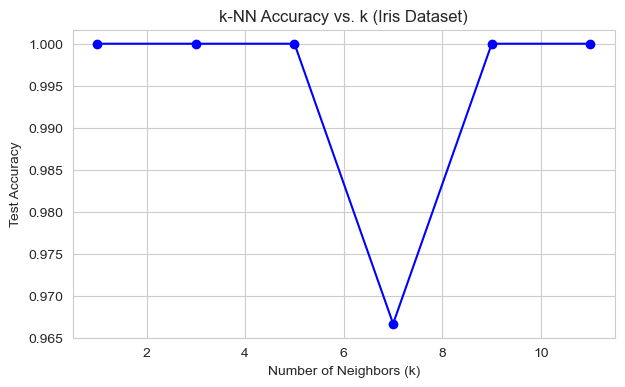

In [15]:
k_values = [1, 3, 5, 7, 9, 11]
acc_knn_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris, y_train_iris)
    y_pred_knn = knn.predict(X_test_iris)
    acc_knn = accuracy_score(y_test_iris, y_pred_knn)
    acc_knn_list.append(acc_knn)
    print(f"k = {k}, Test Accuracy = {acc_knn:.3f}")

plt.figure(figsize=(7, 4))
plt.plot(k_values, acc_knn_list, marker='o', color='blue')
plt.title("k-NN Accuracy vs. k (Iris Dataset)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Accuracy")
plt.show()


# k-Nearest Neighbors (k-NN) on Iris Dataset

This section demonstrates how to evaluate the performance of the **k-Nearest Neighbors (k-NN)** algorithm on the **Iris dataset** for different values of `k` (number of neighbors).

---

## Key Concepts:
1. **k-Nearest Neighbors (k-NN)**:
   - A simple, non-parametric classification algorithm.
   - Classifies a sample based on the majority class among its `k` nearest neighbors in the feature space.

2. **Hyperparameter `k`**:
   - The number of neighbors (`k`) is a critical hyperparameter.
   - Smaller values of `k` make the model more sensitive to noise (high variance).
   - Larger values of `k` smooth the decision boundary, potentially reducing overfitting but increasing bias.

---

## Steps in the Script:
1. **Define k-Values**:
   - A range of `k` values is specified: `[1, 3, 5, 7, 9, 11]`.

2. **Train and Evaluate the Model**:
   - For each `k`:
     - A `KNeighborsClassifier` is initialized with `n_neighbors=k`.
     - The model is trained on the training dataset (`X_train_iris`, `y_train_iris`).
     - The test accuracy is computed as the proportion of correct predictions on the test dataset (`X_test_iris`, `y_test_iris`).

3. **Store Accuracy**:
   - Test accuracies for each `k` are stored in a list (`acc_knn_list`) for further analysis.

4. **Visualize Accuracy vs. k**:
   - A line plot is generated to show the relationship between the number of neighbors (`k`) and the test accuracy.

---

## Observations:
- **Accuracy vs. k**:
  - For small values of `k` (e.g., `k=1`), the model may overfit, resulting in higher variance.
  - For larger values of `k`, the decision boundary becomes smoother, potentially reducing overfitting but increasing bias.

- **Optimal k**:
  - The plot helps identify the value of `k` that yields the highest test accuracy, balancing bias and variance.

---
- The k-NN model on the Iris dataset achieved perfect accuracy (1.000) for most values of `k` (1, 3, 5, 9, 11), suggesting that the dataset is well-separated and simple for classification. However, at `k=7`, the accuracy dropped slightly to 0.967, indicating a potential balance between bias and variance, where a slightly larger `k` reduces overfitting. This behavior reflects the typical bias-variance tradeoff: smaller `k` values may capture noise, leading to overfitting, while larger `k` values generalize better, slightly reducing performance on the test set. Overall, the Iris dataset's simplicity allows for high performance across various `k` values, with `k=7` offering a good trade-off between model complexity and generalization.



# Decision Trees

## Theory

A **Decision Tree** is a tree-based model that iteratively splits the feature space to classify data points or make predictions. The tree consists of:

1. **Nodes**:
   - Each node represents a feature and a decision rule (e.g., "Is petal length < 2.5?").

2. **Branches**:
   - The branches represent the possible outcomes of the decision rule.

3. **Leaves**:
   - The leaves represent the class labels (for classification) or predicted values (for regression).

### How It Works:
- **Splitting**:
  - The algorithm selects the feature and threshold that best separates the classes. This is done by minimizing impurity measures such as:
    - **Gini Impurity**:
      $$
      G = 1 - \sum_{i=1}^C p_i^2
      $$
      Where $p_i$ is the proportion of samples of class $i$ in the node.
    - **Entropy**:
      $$
      H = -\sum_{i=1}^C p_i \log_2(p_i)
      $$
      Where $p_i$ is the proportion of samples of class $i$ in the node.

- **Stopping Criteria**:
  - The splitting stops when one of the following conditions is met:
    - The maximum depth of the tree is reached.
    - A minimum number of samples is required to split a node.

- **Prediction**:
  - For a new sample, the tree traverses from the root to a leaf based on the decision rules, and the class label of the leaf is assigned to the sample.

### Strengths:
- Highly interpretable and easy to understand.
- Handles both numerical and categorical features.
- No need for feature scaling or normalization.

### Limitations:
- Prone to overfitting, especially with deep trees.
- Sensitive to small variations in the data.

---

Decision Tree accuracy on Iris test set: 1.0


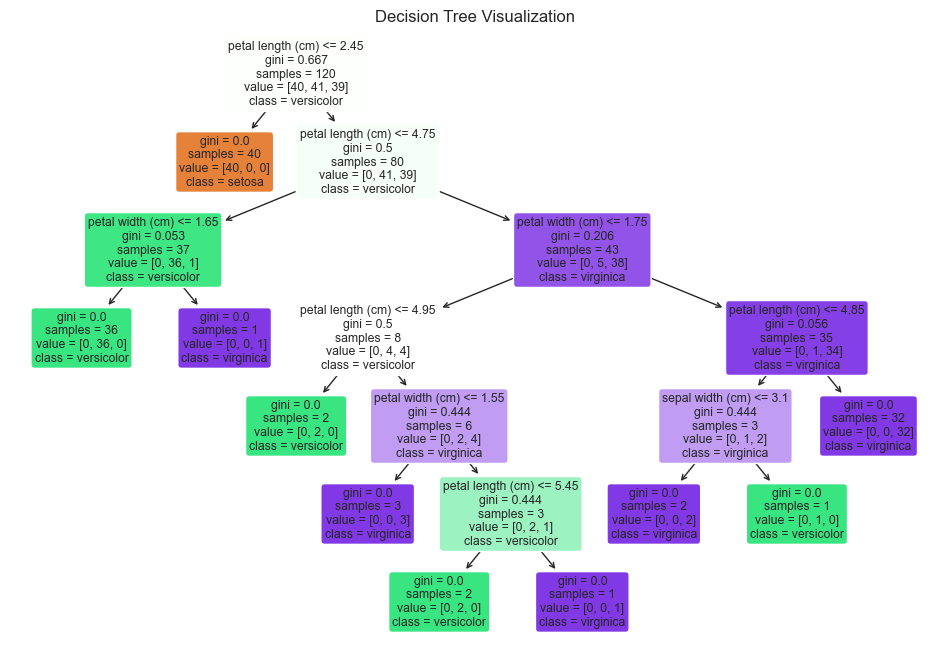

In [30]:
from sklearn.tree import plot_tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_iris, y_train_iris)
y_pred_tree = tree_clf.predict(X_test_iris)

acc_tree = accuracy_score(y_test_iris, y_pred_tree)
print("Decision Tree accuracy on Iris test set:", acc_tree)


# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


# Decision Tree Classifier on Iris Dataset

This section demonstrates how to train and evaluate a **Decision Tree Classifier** on the **Iris dataset**. Decision Trees are versatile and interpretable models that work well for both classification and regression tasks.

---

## Key Concepts:
1. **Decision Tree Classifier**:
   - A Decision Tree splits the dataset into subsets based on feature values, creating a tree-like structure to make predictions.
   - At each node, the tree chooses a feature and threshold that best separates the classes, minimizing impurity (e.g., Gini impurity or entropy).

2. **Model Performance**:
   - Accuracy is computed to evaluate the model’s performance on the test set.

---

## Steps in the Script:
1. **Initialize the Model**:
   - A `DecisionTreeClassifier` is initialized with a fixed `random_state=42` to ensure reproducibility.

2. **Train the Model**:
   - The classifier is trained on the training dataset (`X_train_iris`, `y_train_iris`), learning rules to classify samples into the three Iris classes.

3. **Make Predictions**:
   - The trained model predicts class labels for the test dataset (`X_test_iris`).

4. **Evaluate Performance**:
   - **Accuracy** is computed as the proportion of correctly classified samples in the test dataset:
     - `accuracy = (correct predictions) / (total test samples)`

---

## Observations:
- Decision Trees are highly flexible and can fit the data perfectly on the training set but may overfit for small datasets.
- The test accuracy provides insight into how well the model generalizes to unseen data.

---



# Support Vector Machines (SVM)

## Theory

**Support Vector Machines (SVMs)** are supervised learning models used for classification and regression tasks. They work by finding the hyperplane that best separates the data into classes.

### Key Concepts:
1. **Hyperplane**:
   - A hyperplane is a decision boundary that separates data points of different classes. 
   - For $n$-dimensional data, the hyperplane is an $(n-1)$-dimensional subspace.

2. **Support Vectors**:
   - Support vectors are the data points closest to the hyperplane.
   - These points define the margin, which is the distance between the hyperplane and the closest data points from each class.

3. **Maximizing the Margin**:
   - SVM aims to maximize the margin between the hyperplane and the nearest data points from each class.
   - A larger margin improves the generalization of the model.

4. **Non-Linear Data**:
   - For non-linearly separable data, SVM uses **kernel functions** to transform the data into a higher-dimensional space where a hyperplane can separate the classes.

5. **Kernels**:
   - Common kernel functions include:
     - **Linear Kernel**:
       $K(x, y) = x \cdot y$
     - **Radial Basis Function (RBF) Kernel**:
       $K(x, y) = \exp(-\gamma ||x - y||^2)$
     - **Polynomial Kernel**:
       $K(x, y) = (x \cdot y + c)^d$

---






### **1. Linear Kernel**

The **Linear Kernel** is the simplest kernel function and is often used when the data is linearly separable (i.e., classes can be separated by a straight line or hyperplane).

**Equation**:
$$
K(x, y) = x \cdot y
$$

- **Explanation**:
  - The linear kernel computes the dot product of two feature vectors $x$ and $y$.
  - It does not perform any transformation of the feature space, making it suitable for simple, linearly separable problems.

- **Use Case**:
  - Works well when the data is linearly separable.
  - Frequently used in text classification tasks, where the number of features (e.g., words in a document) is very large compared to the number of samples.

- **Example**:
  - Suppose $x = [2, 3]$ and $y = [1, 4]$, then:
    $$
    K(x, y) = (2 \cdot 1) + (3 \cdot 4) = 14
    $$

---

### **2. Radial Basis Function (RBF) Kernel**

The **RBF Kernel**, also known as the Gaussian kernel, is one of the most commonly used kernels. It maps the data into an infinite-dimensional space, allowing the model to handle complex non-linear problems.

**Equation**:
$$
K(x, y) = \exp\left(-\gamma \cdot ||x - y||^2\right)
$$

- **Explanation**:
  - The RBF kernel computes the similarity between two points $x$ and $y$ based on their Euclidean distance.
  - $\gamma$ (gamma) is a hyperparameter that controls the influence of individual training samples:
    - A **small $\gamma$** creates a smoother decision boundary (less sensitive to individual points).
    - A **large $\gamma$** makes the model focus more on close points, potentially leading to overfitting.

- **Use Case**:
  - Works well for complex, non-linear problems where data cannot be separated linearly.
  - Suitable for most real-world tasks (e.g., image classification, decision boundaries with high complexity).

- **Example**:
  - Suppose $x = [2, 3]$, $y = [1, 4]$, and $\gamma = 0.5$:
    $$
    ||x - y||^2 = (2-1)^2 + (3-4)^2 = 1 + 1 = 2
    $$
    $$
    K(x, y) = \exp(-0.5 \cdot 2) = \exp(-1) \approx 0.367
    $$

---

### **3. Polynomial Kernel**

The **Polynomial Kernel** allows non-linear interaction between features by considering higher-order combinations of the input features.

**Equation**:
$$
K(x, y) = (x \cdot y + c)^d
$$

- **Explanation**:
  - The polynomial kernel computes the similarity between two vectors $x$ and $y$, raised to the power $d$.
  - $c$ is a free parameter that controls the influence of higher-order terms.
  - $d$ is the degree of the polynomial, which determines the complexity of the decision boundary:
    - A **higher $d$** creates more complex decision boundaries but may lead to overfitting.

- **Use Case**:
  - Suitable for tasks where interactions between features are important (e.g., when the decision boundary is non-linear but predictable).
  - Allows the model to consider polynomial combinations of input features.

- **Example**:
  - Suppose $x = [2, 3]$, $y = [1, 4]$, $c = 1$, and $d = 2$:
    $$
    x \cdot y = (2 \cdot 1) + (3 \cdot 4) = 14
    $$
    $$
    K(x, y) = (14 + 1)^2 = 15^2 = 225
    $$

---

## Choosing the Right Kernel

1. **Linear Kernel**:
   - Use when the data is linearly separable or the number of features is very large compared to the number of samples (e.g., text data).

2. **RBF Kernel**:
   - Use when the data is non-linear and requires complex decision boundaries.
   - Often works well as a general-purpose kernel.

3. **Polynomial Kernel**:
   - Use when interactions between features (e.g., quadratic, cubic) are important.
   - Requires careful tuning of the degree $d$ to avoid overfitting.

---

## Comparison of Kernels

| **Kernel**        | **Equation**                       | **Key Parameters**            | **Use Case**                               |
|--------------------|------------------------------------|--------------------------------|--------------------------------------------|
| Linear Kernel      | $K(x, y) = x \cdot y$             | None                           | Linearly separable data, high-dimensional datasets. |
| RBF Kernel         | $K(x, y) = \exp(-\gamma ||x-y||^2)$ | $\gamma$                       | Non-linear problems, general-purpose kernel.         |
| Polynomial Kernel  | $K(x, y) = (x \cdot y + c)^d$     | $c$ (constant), $d$ (degree)   | Interaction between features, non-linear decision boundaries. |

---

## Conclusion

- **Kernels** play a critical role in the flexibility of SVMs, enabling them to solve both linear and non-linear problems.
- The choice of kernel depends on the nature of the data and the problem at hand.
- Among the kernels, the **RBF kernel** is the most commonly used due to its ability to handle complex and non-linear problems effectively.

## Implementation


In [17]:
svm_clf = SVC(kernel='rbf', gamma='scale')
svm_clf.fit(X_train_iris, y_train_iris)
y_pred_svm = svm_clf.predict(X_test_iris)

acc_svm = accuracy_score(y_test_iris, y_pred_svm)
print("SVM (RBF) accuracy on Iris test set:", acc_svm)


SVM (RBF) accuracy on Iris test set: 1.0


# Support Vector Machine (SVM) with RBF Kernel on Iris Dataset

This section demonstrates how to train and evaluate a **Support Vector Machine (SVM)** classifier with a **Radial Basis Function (RBF) kernel** on the **Iris dataset**. SVMs are powerful models for classification tasks, especially when the data is not linearly separable.

---

## Key Concepts:
1. **Support Vector Machine (SVM)**:
   - SVM finds the hyperplane that best separates classes in the feature space by maximizing the margin between data points and the hyperplane.
   - The **RBF kernel** is a popular choice for non-linear classification, as it maps input features into a higher-dimensional space where a hyperplane can separate the classes.

2. **Kernel Trick**:
   - The RBF kernel uses a function of the distance between points to transform the data into a higher-dimensional space without explicitly computing the transformation.

3. **Gamma Parameter**:
   - **`gamma`** determines the influence of individual training samples on the decision boundary.
   - In this script, `gamma='scale'` adjusts the value based on the number of features in the dataset.

---

## Steps in the Script:
1. **Initialize the Model**:
   - A `SVC` (Support Vector Classifier) is initialized with the **RBF kernel** and default `gamma='scale'`.

2. **Train the Model**:
   - The SVM is trained on the training dataset (`X_train_iris`, `y_train_iris`).

3. **Make Predictions**:
   - The trained model predicts class labels for the test dataset (`X_test_iris`).

4. **Evaluate Performance**:
   - **Accuracy** is computed as the proportion of correctly classified samples in the test dataset:
     - `accuracy = (correct predictions) / (total test samples)`

---

## Observations:
- SVMs with RBF kernels perform well on datasets with non-linear relationships between features and classes.
- The test accuracy provides insight into how well the model generalizes to unseen data.

---




## 1. More Features for Regression



# Regression with Multiple Features

Previously, we used a single feature (Median Income) for regression. Now, we'll use **multiple features** from the California Housing dataset to improve the model's performance.


In [18]:
# Use multiple features
X_multi = cal_housing.data  # Use all features
y_multi = cal_housing.target

# Split data into training and test sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Train a Linear Regression model
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_multi = lin_reg_multi.predict(X_test_multi)

# Compute and display MSE
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
print("Linear Regression (Multiple Features):")
print(f"  Coefficients: {lin_reg_multi.coef_}")
print(f"  Intercept:    {lin_reg_multi.intercept_:.3f}")
print(f"  MSE on Test:  {mse_multi:.3f}")


Linear Regression (Multiple Features):
  Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
  Intercept:    -37.023
  MSE on Test:  0.556


# Linear Regression with Multiple Features on California Housing Dataset

This section demonstrates how to apply **Linear Regression** using multiple features from the **California Housing dataset**. We will train a regression model to predict the median house value based on several features such as **median income**, **housing age**, **number of rooms**, and more.

---

## Key Concepts:
1. **Linear Regression**:
   - Linear Regression models the relationship between a dependent variable and one or more independent variables.
   - It assumes a linear relationship between the features and the target variable.
   
2. **Multiple Features**:
   - Instead of using just one feature (e.g., median income), we use multiple features to improve the prediction accuracy. In this case, the model uses all available features in the California Housing dataset.
   
3. **Mean Squared Error (MSE)**:
   - MSE is a common metric for regression models, calculating the average squared difference between the predicted and actual values. A lower MSE indicates better model performance.

---

## Steps in the Script:
1. **Load and Prepare Data**:
   - The `cal_housing` dataset is loaded using `fetch_california_housing()`, which provides the features (X) and the target variable (y).
   
2. **Split Data**:
   - The data is split into training and testing sets using an 80-20 split.
   
3. **Train the Model**:
   - A `LinearRegression` model is trained on the training dataset (`X_train_multi`, `y_train_multi`).

4. **Make Predictions**:
   - The model is then used to predict the median house value for the test dataset (`X_test_multi`).

5. **Evaluate the Model**:
   - The **Mean Squared Error (MSE)** is computed to evaluate the model's performance on the test set.

---



## 2. Cross-Validation



# Cross-Validation

Cross-validation splits the data into multiple training and validation subsets, allowing us to evaluate the model's performance on unseen data and reduce the risk of overfitting.


In [19]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lin_reg_multi, X_multi, y_multi, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to positive
cv_scores = -cv_scores

print("Cross-Validation MSE Scores:", cv_scores)
print("Mean MSE:", cv_scores.mean())
print("Standard Deviation of MSE:", cv_scores.std())


Cross-Validation MSE Scores: [0.48485857 0.62249739 0.64621047 0.5431996  0.49468484]
Mean MSE: 0.5582901717686812
Standard Deviation of MSE: 0.06560199778304031


# Cross-Validation for Linear Regression on California Housing Dataset

This section demonstrates how to perform **5-Fold Cross-Validation** to evaluate the performance of the **Linear Regression** model using the California Housing dataset.

---

## Key Concepts:
1. **Cross-Validation**:
   - Cross-validation is a technique used to assess how a model generalizes to unseen data by splitting the dataset into multiple folds.
   - The model is trained on `k-1` folds and tested on the remaining fold. This process is repeated `k` times, and the results are averaged.

2. **Mean Squared Error (MSE)**:
   - MSE is used as the evaluation metric to measure the average squared difference between predicted and actual values.
   - Lower MSE values indicate better model performance.

3. **5-Fold Cross-Validation**:
   - The dataset is split into 5 folds:
     - Each fold is used once as the test set while the remaining 4 folds are used for training.
   - This approach provides a robust estimate of the model's performance by reducing variance caused by data splitting.

---

## Steps in the Script:
1. **Perform Cross-Validation**:
   - The `cross_val_score` function performs 5-Fold Cross-Validation on the Linear Regression model (`lin_reg_multi`).
   - The scoring metric is set to `neg_mean_squared_error` because scikit-learn minimizes metrics by default. The negative sign is corrected later.

2. **Convert and Analyze Scores**:
   - The negative MSE scores returned by `cross_val_score` are converted to positive values.
   - The mean and standard deviation of the MSE scores across the folds are calculated to summarize the model's performance.

---


## 3. Hyperparameter Tuning: Grid Search



# Hyperparameter Tuning: Grid Search

Grid Search exhaustively tries all combinations of hyperparameters in a specified grid. Let's use Ridge Regression as an example, which adds a regularization term to Linear Regression to reduce overfitting.


In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the Ridge Regression model
ridge = Ridge()

# Define a grid of alpha (regularization strength) values
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_multi, y_train_multi)

# Get the best parameters and MSE score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation MSE:", best_score)

# Train the best model on the full training set and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_multi)
mse_test_best = mean_squared_error(y_test_multi, y_pred_best)

print("Test Set MSE with Best Model:", mse_test_best)


Best Parameters: {'alpha': 10}
Best Cross-Validation MSE: 0.5192548258531765
Test Set MSE with Best Model: 0.5550405537342993


# Ridge Regression with Grid Search on California Housing Dataset

This section demonstrates how to apply **Ridge Regression** with hyperparameter tuning using **Grid Search** and cross-validation. Ridge Regression adds regularization to Linear Regression, addressing potential issues of overfitting by penalizing large coefficients.

---

## Key Concepts:
1. **Ridge Regression**:
   - Ridge Regression introduces an L2 regularization term to the Linear Regression loss function:
     \[
     Loss = \text{MSE} + \alpha \sum_{i=1}^n \beta_i^2
     \]
   - The regularization term penalizes large coefficient values, reducing model complexity and improving generalization.

2. **Hyperparameter `alpha`**:
   - Controls the strength of regularization:
     - Smaller `alpha` values make the model closer to standard Linear Regression.
     - Larger `alpha` values increase the penalty on large coefficients, making the model simpler.

3. **Grid Search**:
   - Grid Search evaluates the model for various `alpha` values using cross-validation, selecting the one that minimizes the mean squared error (MSE).

---

## Steps in the Script:
1. **Define the Model**:
   - A `Ridge` regression model is initialized without specifying the `alpha` value.

2. **Define the Parameter Grid**:
   - A range of `alpha` values is specified: `[0.1, 1, 10, 100, 1000]`.

3. **Perform Grid Search**:
   - `GridSearchCV` performs 5-fold cross-validation for each value of `alpha`.
   - The scoring metric is set to `neg_mean_squared_error` to evaluate performance.

4. **Extract Best Parameters**:
   - The `best_params_` attribute returns the optimal `alpha` value.
   - The `best_score_` attribute provides the cross-validated MSE score for the best `alpha`.

5. **Train and Evaluate Best Model**:
   - The best Ridge model is trained on the full training set.
   - The model's performance is evaluated on the test set by computing the test set MSE.

---



## 4. Hyperparameter Tuning: Randomized Search



# Hyperparameter Tuning: Randomized Search

Randomized Search tries a fixed number of randomly sampled hyperparameter combinations from a specified range. This can be more efficient for large hyperparameter spaces.


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the Ridge Regression model
ridge = Ridge()

# Define a range for alpha using a uniform distribution
param_dist = {'alpha': uniform(0.1, 100)}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(ridge, param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_multi, y_train_multi)

# Get the best parameters and MSE score
best_params_random = random_search.best_params_
best_score_random = -random_search.best_score_

print("Best Parameters (Randomized Search):", best_params_random)
print("Best Cross-Validation MSE (Randomized Search):", best_score_random)

# Train the best model from Randomized Search and evaluate on the test set
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test_multi)
mse_test_random = mean_squared_error(y_test_multi, y_pred_random)

print("Test Set MSE with Best Model (Randomized Search):", mse_test_random)


Best Parameters (Randomized Search): {'alpha': 9.867211400638388}
Best Cross-Validation MSE (Randomized Search): 0.5192547829247955
Test Set MSE with Best Model (Randomized Search): 0.5550514258692678


# Ridge Regression with Randomized Search on California Housing Dataset

This section demonstrates how to apply **Ridge Regression** with hyperparameter tuning using **Randomized Search** and cross-validation. Randomized Search is an efficient alternative to Grid Search, especially when searching over a large hyperparameter space.

---

## Key Concepts:
1. **Ridge Regression**:
   - Ridge Regression incorporates L2 regularization to control model complexity and prevent overfitting.
   - It penalizes large coefficients, improving generalization by reducing the model's sensitivity to noise in the training data.

2. **Randomized Search**:
   - Randomized Search samples hyperparameter combinations randomly from a specified distribution.
   - It reduces computational cost by evaluating a fixed number of randomly selected parameter combinations (`n_iter`).

3. **Hyperparameter `alpha`**:
   - Controls the strength of regularization in Ridge Regression.
   - Smaller `alpha` values make the model closer to standard Linear Regression, while larger values increase regularization.

---

## Steps in the Script:
1. **Define the Model**:
   - A `Ridge` regression model is initialized without specifying the `alpha` value.

2. **Define the Parameter Distribution**:
   - A range of `alpha` values is specified using a uniform distribution (`uniform(0.1, 100)`), allowing the search to explore a wide range of possible regularization strengths.

3. **Perform Randomized Search**:
   - `RandomizedSearchCV` performs cross-validation for 50 randomly sampled `alpha` values.
   - The scoring metric is set to `neg_mean_squared_error` to evaluate performance.

4. **Extract Best Parameters**:
   - The `best_params_` attribute returns the optimal `alpha` value.
   - The `best_score_` attribute provides the cross-validated MSE score for the best `alpha`.

5. **Train and Evaluate Best Model**:
   - The best Ridge model is trained on the full training set.
   - The model's performance is evaluated on the test set by computing the test set MSE.

---




# Conclusion

In this notebook, we covered:
- **Regression**: Linear & Polynomial
- **Classification**: Logistic Regression, k-NN, Decision Trees, and SVM

We used:
- **California Housing dataset** for regression demos.
- **Iris dataset** for classification demos.

### Key Takeaways:
1. Each model has strengths and weaknesses; there's no single best model for all tasks.
2. Proper **data preprocessing**, **feature engineering**, and **hyperparameter tuning** are crucial for performance.
3. Always watch out for **overfitting** (especially with high-degree polynomials or very large models).


# Comprehensive Workflow

We continue by exploring the process of building and fine-tuning regression models using the California Housing dataset. Starting with a basic **Linear Regression** model, we progressively expand our approach by incorporating **multiple features** to improve predictions. To ensure robust performance, we utilize **cross-validation**, which evaluates the model's accuracy across multiple data splits, reducing overfitting risk. Furthermore, we dive into **hyperparameter tuning** with both **Grid Search** and **Randomized Search**, optimizing the Ridge Regression model's regularization parameter to balance bias and variance effectively. By the end, this notebook provides a comprehensive workflow for developing high-performing regression models through systematic evaluation and parameter optimization.


# Regression with Multiple Features: Cross-Validation and Hyperparameter Tuning

In this notebook, we will:
1. Use **multiple features** from the California Housing dataset for regression.
2. Apply **cross-validation** to evaluate the model's performance.
3. Perform **hyperparameter tuning** with:
   - **Grid Search**
   - **Randomized Search**

### Dataset
The [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) contains data on housing features and target values representing the median house value.

### Tools and Libraries
We will use:
- `scikit-learn` for model building, evaluation, and tuning.
- `numpy` and `pandas` for data manipulation.
- `matplotlib` and `seaborn` for visualization.


In [9]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform

# Visualization settings
sns.set_style("whitegrid")


## Loading and Exploring the California Housing Dataset

We will:
1. Load the dataset.
2. Explore the features and target.
3. Split the data into training and test sets.


In [24]:
# Load the California Housing dataset
cal_housing = fetch_california_housing()
X = cal_housing.data
y = cal_housing.target

# Convert to DataFrame for easier exploration
feature_names = cal_housing.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Summary statistics
print("\nDataset Summary:")
print(df.describe())

# Check dataset shape
print("\nDataset Shape:", df.shape)


Dataset Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0

## Data Preprocessing

We will:
1. Use all features for regression.
2. Split the data into training and test sets.


In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print shapes of the splits
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (16512, 8)
Test set shape: (4128, 8)


## Regression with Multiple Features

We will:
1. Train a Linear Regression model using multiple features.
2. Evaluate its performance on the test set using Mean Squared Error (MSE).
3. Visualize the predicted vs actual target values.


Linear Regression (Multiple Features):
  Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
  Intercept:    -37.023
  Test Set MSE: 0.556


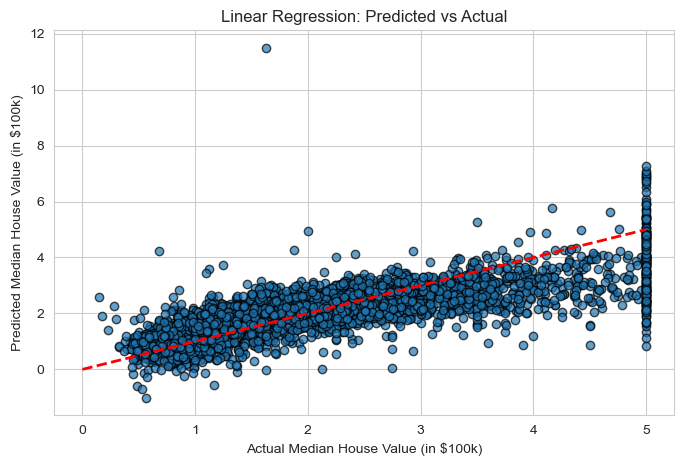

In [26]:
# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Linear Regression (Multiple Features):")
print(f"  Coefficients: {lin_reg.coef_}")
print(f"  Intercept:    {lin_reg.intercept_:.3f}")
print(f"  Test Set MSE: {mse:.3f}")

# Visualize predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor="k")
plt.plot([0, 5], [0, 5], '--r', lw=2)  # Perfect prediction line
plt.xlabel("Actual Median House Value (in $100k)")
plt.ylabel("Predicted Median House Value (in $100k)")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()


## Cross-Validation

We will perform 5-fold cross-validation to evaluate the model's performance on multiple splits of the dataset.


In [27]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to positive
cv_scores = -cv_scores

print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE:", cv_scores.mean())
print("Standard Deviation of MSE:", cv_scores.std())


Cross-Validation MSE Scores: [0.48485857 0.62249739 0.64621047 0.5431996  0.49468484]
Mean Cross-Validation MSE: 0.5582901717686812
Standard Deviation of MSE: 0.06560199778304031


## Hyperparameter Tuning: Grid Search

We will:
1. Use Ridge Regression, which includes a regularization parameter (`alpha`).
2. Perform Grid Search to find the best `alpha` value.


In [28]:
# Define the Ridge Regression model
ridge = Ridge()

# Define a grid of alpha values
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and MSE score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Grid Search Results:")
print("  Best Parameters:", best_params)
print("  Best Cross-Validation MSE:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)
mse_test_grid = mean_squared_error(y_test, y_pred_grid)

print("Test Set MSE with Best Model:", mse_test_grid)


Grid Search Results:
  Best Parameters: {'alpha': 10}
  Best Cross-Validation MSE: 0.5192548258531765
Test Set MSE with Best Model: 0.5550405537342993


## Hyperparameter Tuning: Randomized Search

We will:
1. Use Ridge Regression.
2. Perform Randomized Search with a uniform distribution of `alpha` values.


Randomized Search Results:
  Best Parameters: {'alpha': 8.94925020519195}
  Best Cross-Validation MSE: 0.519
Test Set MSE with Best Model (Randomized Search): 0.555


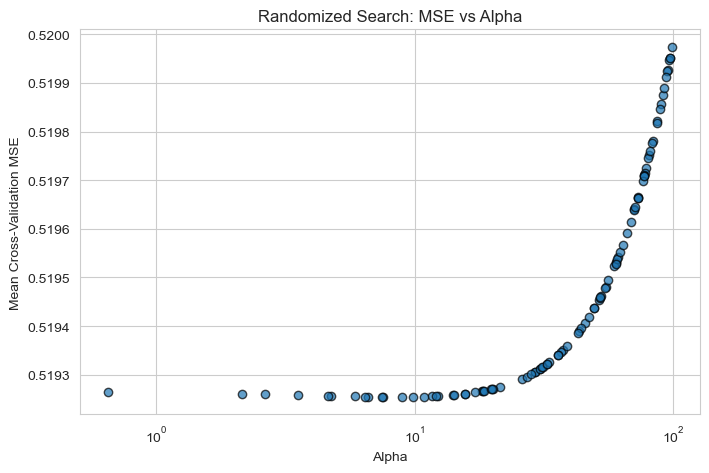

In [10]:

# Load the California Housing dataset
cal_housing = fetch_california_housing()
X = cal_housing.data
y = cal_housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define a uniform distribution for alpha values
param_dist = {'alpha': uniform(0.1, 100)}

# Initialize Ridge Regression model
ridge = Ridge()

# Perform Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=ridge, 
    param_distributions=param_dist, 
    n_iter=100,  # Number of parameter settings to sample
    cv=5,        # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available processors
)

# Fit Randomized Search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and corresponding MSE score
best_params_random = random_search.best_params_
best_score_random = -random_search.best_score_

print("Randomized Search Results:")
print(f"  Best Parameters: {best_params_random}")
print(f"  Best Cross-Validation MSE: {best_score_random:.3f}")

# Evaluate the best model on the test set
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)
mse_test_random = mean_squared_error(y_test, y_pred_random)

print(f"Test Set MSE with Best Model (Randomized Search): {mse_test_random:.3f}")

# Visualize the relationship between alpha values and mean cross-validation MSE
plt.figure(figsize=(8, 5))
results = random_search.cv_results_
alphas = results['param_alpha'].data
mse_scores = -results['mean_test_score']
plt.scatter(alphas, mse_scores, alpha=0.7, edgecolor="k")
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Mean Cross-Validation MSE")
plt.title("Randomized Search: MSE vs Alpha")
plt.show()

